In [63]:
# Import packagaes to view images
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import random forest package for vectorising the images
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


#Import package to split training and testing images
from sklearn.model_selection import train_test_split

# Import the MNIST data
from keras.datasets import mnist

# Import the confusion matrix package
from sklearn.metrics import confusion_matrix

#Import seaborn vor visualisations
import seaborn as sns

#Import pandas package
import pandas as pd

#Import accuracy_score, precision_score, recall_score and f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [54]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [55]:
# Reshape the arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Split the training data into a development and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# train dataset is used to train the model
# test dataset is used to determine the accuracy the model
# val dataset is to validate the model 

In [56]:
# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Evaluate the classifier on the validation set
val_acc = clf.score(X_val, y_val)
print(val_acc)

# Evaluate the classifier on the test set
test_acc = clf.score(X_test, y_test)
print(test_acc)

0.9673333333333334
0.9675


For the validation data the model is 96.63% accurate while the model is 96.71% accurate on the testing data

An important parameter that can be tuned in a Random Forest classifier is the number of trees in the forest, represented by the n_estimators parameter.

In [58]:
# Create a dictionary of candidate values for n_estimators
param_grid = {'n_estimators': [50, 100, 150, 200, 250]}

# Create a Random Forest classifier
rfc = RandomForestClassifier()

# Use GridSearchCV to find the best n_estimators value
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best value for n_estimators
print("Best value for n_estimators:", grid_search.best_params_['n_estimators'])

Best value for n_estimators: 250


In [59]:
#Run the  random forest classifier with new n_estimators
clf = RandomForestClassifier(n_estimators=250) # 250 was taken since it was the value determined from tuning the parameter

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
val_acc = clf.score(X_val, y_val)
print(val_acc)

# Evaluate the classifier on the test set
test_acc = clf.score(X_test, y_test)
print(test_acc)

0.96975
0.9692


In [60]:
# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

In [61]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[ 971    0    1    0    0    3    2    1    2    0]
 [   0 1125    2    2    0    2    2    0    1    1]
 [   6    0  999    7    1    0    4    8    7    0]
 [   0    0   11  973    0    7    0    9    7    3]
 [   1    0    2    0  953    0    5    0    2   19]
 [   3    0    0   13    4  859    6    1    4    2]
 [   7    3    1    0    5    4  936    0    2    0]
 [   1    5   20    1    0    0    0  989    3    9]
 [   5    0    6    7    4    5    6    4  928    9]
 [   6    6    2    9   13    4    1    4    5  959]]


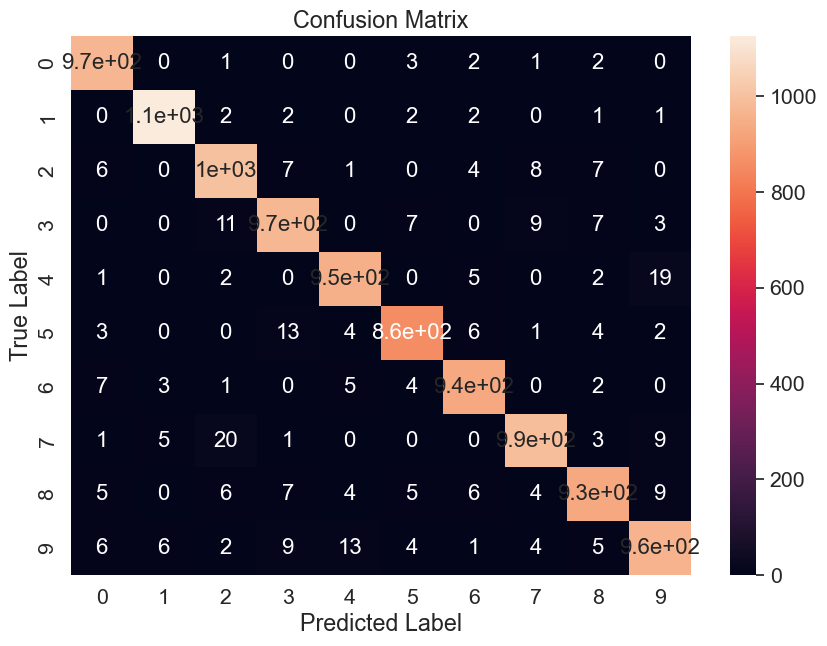

In [62]:
# Create a better formatted confusion matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Format the confusion matrix
df_cm = pd.DataFrame(cm, range(10), range(10)) #Creat a dataframe for the confusion matrix
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

From the formatted confusion matrix it would seem that the model struggles with the 7 and 4 class. Where it had 20 incorrect predictions for 7 which it mistook for 2 and 13 incorrect predictions where the model mistook a 9 for a 4. The reason for this could be the similar shapes these numbers have.

In [64]:
# Calculate the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9692
Precision: 0.969198453730757
Recall: 0.9692
F1-Score: 0.9691745902293578
